# 2022 COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('training_data.csv')

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('testing_data.csv')

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [ ]:
# Preview of the data in the csv file, which has two columns:
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head()

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...


In [ ]:
# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

## 1.1. URL Removal
*related to the section 4.2*

In [ ]:
# url removal
"""
This need to be used in section 4.2 for compariosn of text with url and without url.
parameters need to be string.
"""
import re
def url_removal_re(x):
    x = re.sub(r'http\S+', '', x)
    return x

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [ ]:
# import libraries
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = sw.words()

################# Default Preprocessing Techniques#################
####### Including punctuation removal, lowercase, tokenisation, and stopwords removal
# punctuation removal
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    return x

def defaultPreprocessing(postset):
  pre_postset = []
  for post in postset:
    post_token = word_tokenize(remove_punctuation_re(post.lower()))
    # stopwords removal
    filtered_post = [w for w in post_token if not w in stop_words]
    pre_postset.append(filtered_post)
  return pre_postset

################# Changed Preprocessing Techniques#################
####### Except for url removal, stemming and lemmatisation would also change
# stemming
def stemming(post):
  stemmer = PorterStemmer()
  post = [stemmer.stem(x) for x in post]
  return post

# lemmatisation
def lemmatisation (post):
  lemmatizer = WordNetLemmatizer()
  post = [lemmatizer.lemmatize(w) for w in post ]
  return post

################# Full Preprocessing#################
####### Dataset preprocessed with all techniques
def full_preprocessing(postset):
  """
  This function contains all pre-processing techniques: url removal, default, stemming, and lemmatisation
  """
  # url removal
  postset = [url_removal_re(post) for post in postset]
  # default preprocessing
  postset = defaultPreprocessing(postset)
  #stemming
  postset = [lemmatisation(stemming(post)) for post in postset]
  return postset

####### Full_preprocesing with all data
"""training_posts_full = full_preprocessing(training_posts)
testing_posts_full = full_preprocessing(testing_posts)"""

####### Intermedia data to save time
def Read_list(filename):
    file1 = open(filename+".txt", "r")
    list_row =file1.readlines()
    list_source = []
    for i in range(len(list_row)):
        column_list = list_row[i].strip().split("\t")
        list_source.append(column_list)
    file1.close()
    return list_source

id = '1SNmI83Efq9si_R_gQuE2HeW2KAbVmaaW'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Full_training.txt')

id = '1NcNwVMVRkS-b3A2JY4IQPr45jC07fuHG'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Full_testing.txt')

training_posts_full = Read_list('Full_training')
testing_posts_full = Read_list('Full_testing')
posts_full = training_posts_full + testing_posts_full

################# Label Encoding#################

unique_labels = np.unique(training_labels)

lEnc = LabelEncoder()
# Encode the labels
training_labels_encoded = lEnc.fit_transform(training_labels)
testing_labels_encoded = lEnc.transform(testing_labels)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['F' 'T']
[0 1]




---



# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [ ]:
# import libraries
from gensim.models import Word2Vec

def cBowParameter(dataset, size, window) :
  wv_cbow_model = Word2Vec(sentences=dataset, size=size, window=window, min_count=5, workers=1, sg=0)
  emb = wv_cbow_model.wv.vectors
  vocab_obj = wv_cbow_model.wv.vocab
  vocab = {}
  for word, obj in vocab_obj.items():
    vocab[word] = vocab_obj[word].index
  # Adding unknown in the vocabulary
  index = len(vocab)
  vocab['[UNKNOWN]'] = index
  emb = np.concatenate([emb, np.zeros((1, emb.shape[1]))],axis=0)
  return emb, vocab

def skipGramParameter(dataset, size, window):
  wv_cbow_model = Word2Vec(sentences=dataset, size=size, window=window, min_count=5, workers=1, sg=1)
  emb = wv_cbow_model.wv.vectors
  vocab_obj = wv_cbow_model.wv.vocab
  vocab = {}
  for word, obj in vocab_obj.items():
    vocab[word] = vocab_obj[word].index
  # Adding unknown in the vocabulary
  index = len(vocab)
  vocab['[UNKNOWN]'] = index
  emb = np.concatenate([emb, np.zeros((1, emb.shape[1]))],axis=0)
  return emb, vocab

################# Optimal Embedding Result #################
####### dim = 100, window = 2, full_processing techniques, SkipGram alone
optimal_emb, optimal_vocab = skipGramParameter(posts_full, 100, 2)
optimal_emb_dim = 100
optimal_emb_table = np.array(optimal_emb)
optimal_word_list = list(optimal_vocab.keys())
optimal_word_index = optimal_vocab
optimal_vocab_size = len(optimal_word_list)

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [ ]:
import gensim.downloader as api

word_emb_model_25 = api.load("glove-twitter-25")
word_emb_model_50 = api.load("glove-twitter-50")

####### Get word list and word index
def get_wordList(train, test):
  # Create word list and word index
  sentences = train + test
  word_set = set()
  for sent in sentences:
      for word in sent:
          word_set.add(word)
  word_set.add('[UNKNOWN]')
  word_list = list(word_set)
  word_list.sort()

  word_index = {}
  ind = 0
  for word in word_list:
      word_index[word] = ind
      ind += 1
  return word_list, word_index

####### Get embedding table
def get_embTable(emb_model, word_list):
  emb_dim = emb_model.vector_size
  emb_table = []
  for i, word in enumerate(word_list):
      if word in emb_model:
          emb_table.append(emb_model[word])
      else:
          emb_table.append([0]*emb_dim)
  emb_table = np.array(emb_table)
  return emb_table, emb_dim

## 2.3. Input Concatenation
*related to the section 4.3*

In [ ]:
def emb_concat(pre_emb, emb, vocab):
  emb_dim = pre_emb.vector_size+100
  # add the second pre-trained word embedding to the Embedding lookup table via concatenation
  emb_table = []
  for word, index in vocab.items():
      if word in pre_emb:
          emb_table.append(np.concatenate((pre_emb[word],emb[index]),0))
      else:
          emb_table.append([0]*emb_dim)
  emb_table = np.array(emb_table)
  return emb_table, emb_dim

# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

####### Encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        sent_encoded.append(temp_encoded)
    return sent_encoded

################# Bi-directional models#################
####### Bi-RNN model
class Bi_RNN_Emb(nn.Module):
    def __init__(self, vocab_size, emb_dim, emb_table):
        super(Bi_RNN_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.rnn = nn.RNN(emb_dim, 100, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(100*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        length = [len(i) for i in x]
        x = pad_sequence(x, batch_first=True)
        x = self.emb(x)
        x = pack_padded_sequence(x, length,batch_first=True,enforce_sorted=False)
        x, h_n = self.rnn(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

####### Bi-LSTM model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, emb_dim, emb_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, 100, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(100*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        length = [len(i) for i in x]
        x = pad_sequence(x, batch_first=True)
        x = self.emb(x)
        # print(x)
        x = pack_padded_sequence(x, length,batch_first=True,enforce_sorted=False)
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
import random
import os
# set random seed for reproduce

def set_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def getTrained(dataset, dataset_label, word_list, lr, epoch_num, model_type):
  set_seed(25)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  batch_size = 128
  total_epoch = epoch_num
  learning_rate = lr

  # Initialize model, set up the loss calculator and optimizer
  model = model_type.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  f1_list = []

  # Training the model
  for epoch in range(total_epoch):
      train_loss = 0
      for ind in range(0,len(dataset_label),batch_size):
          input_batch = dataset[ind:min(ind+batch_size, len(dataset))]
          target_batch = dataset_label[ind:min(ind+batch_size, len(dataset_label))]
          # input_torch = torch.from_numpy(np.array(input_batch)).to(device)
          input_torch = [torch.tensor(x, device=device) for x in input_batch]
          target_torch = torch.from_numpy(np.array(target_batch)).view(-1).to(device)

          model.train()
          optimizer.zero_grad()
          outputs = model(input_torch)
          loss = criterion(outputs,  target_torch)
          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      predicted = torch.argmax(outputs, -1)
      f1= f1_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
      f1_list.append(f1)

      # print('Epoch: %d, train_loss: %.5f, train_F1Score: %.2f' %(epoch + 1, loss.item(), f1))

  print('Finished Training')
  return model, f1_list

################# Optimal Model Parameter #################
####### LSTModel, lr = 0.01, epoch = 40
# Encoding
# Convert the sentences to the word index that aligns with the lookup table
optimal_len_list = [len(s) for s in training_posts_full]
optimal_seq_length = max(optimal_len_list)
optimal_train_encoded = encode_and_add_padding(training_posts_full, optimal_seq_length, optimal_word_index)
optimal_test_encoded = encode_and_add_padding(testing_posts_full, optimal_seq_length, optimal_word_index)

####### LSTM
optimal_model, optimal_f1_list = getTrained(optimal_train_encoded, training_labels_encoded, optimal_word_list, 0.01, 40,\
                                Bi_LSTM_Emb(vocab_size = optimal_vocab_size, emb_dim = optimal_emb_dim, emb_table = optimal_emb_table))

####### Save model
torch.save(optimal_model,'optimal_model.pt')

Finished Training


# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)




fatal: destination path 'GloVe' already exists and is not an empty directory.
size 50 model has completed.
size 100 model has completed.
size 200 model has completed.
window 2 model has completed.
window 5 model has completed.
window 10 model has completed.


,Models,Dim,Win,Sem_acc,Syn_acc,Total_acc
0,size 50,50,5,15.59%,10.79%,11.40%
1,size 100,100,5,17.97%,12.41%,13.11%
2,size 200,200,5,17.63%,12.46%,13.11%
3,window 2,100,2,17.63%,15.15%,15.47%
4,window 5,100,5,17.97%,12.41%,13.11%
5,window 10,100,10,18.64%,10.54%,11.57%


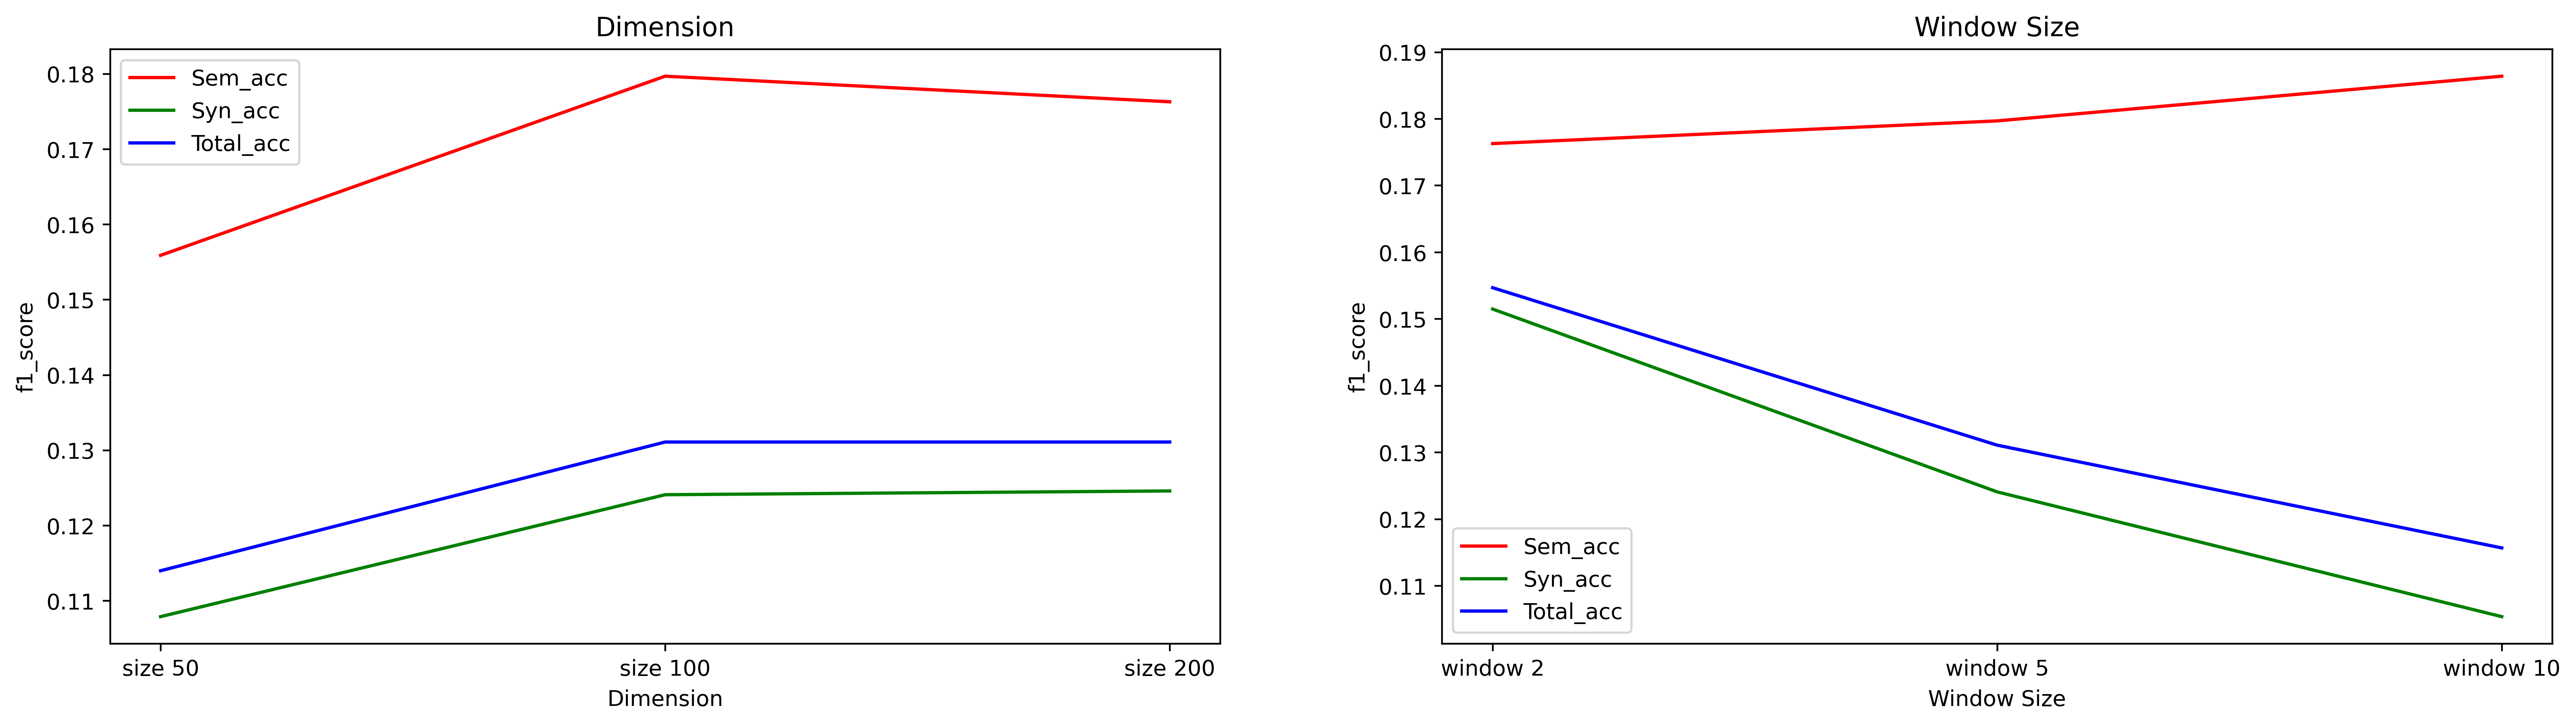

In [ ]:
################# Sementic-Syntactic Word Relationship Test#################

!git clone https://github.com/stanfordnlp/GloVe.git

def evaluate_vectors(W, vocab, prefix='./GloVe/eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            # print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            # print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)

            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        # print("%s:" % filenames[i])
        # print('ACCURACY TOP1: %.2f%% (%d/%d)' %
        #     (np.mean(val) * 100, np.sum(val), len(val)))

    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

################# Embedding Testing #################
####### Dataset preprocessed with all techniques
# parameter size and window
# models = {'size 10': [10, 5]}
def embeddingEvaluate(model):
  emb_chart = {}
  sem_list = []
  syn_list = []
  total_list = []
  model_num = 0
  for parameter, plist in model.items():
    emb, vectors = cBowParameter(posts_full,plist[0], plist[1])
    vocab_words=list(vectors.keys())
    vocab_size = len(vocab_words)
    #print("Vocab size: ",str(vocab_size))
    # create word->index and index->word converter
    vocab = {w: idx for idx, w in enumerate(vocab_words)}
    ivocab = {idx: w for idx, w in enumerate(vocab_words)}

    # create the embedding matrix of shape (vocab_size, dim)
    vector_dim = plist[0]
    W = np.zeros((vocab_size-1, vector_dim))
    for word, v in vectors.items():
        if word == '[UNKNOWN]':
            continue
        W[vocab[word], :] = emb[v]

    # normalize each word vector to unit length
    W_norm = np.zeros(W.shape)
    d = (np.sum(W ** 2, 1) ** (0.5))
    W_norm = (W.T / d).T

    # Evaluation metrics
    correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')
    sem_acc = correct_sem / float(count_sem)
    syn_acc = correct_syn / float(count_syn)
    total_acc = correct_tot / float(count_tot)

    # make emb_evaluation result dictionary
    emb_chart[parameter] = [plist[0], plist[1], "{:.2f}%".format(sem_acc*100), "{:.2f}%".format(syn_acc*100), "{:.2f}%".format(total_acc*100)]
    sem_list.append(round(sem_acc, 4))
    syn_list.append(round(syn_acc, 4))
    total_list.append(round(total_acc, 4))
    # print track information
    model_num = 0
    print('%s model has completed.' % parameter)
    # print('sem_acc: %.2f%%; syn_acc: %.2f%%; total_acc: %.2f%%' % sem_acc, syn_acc, total_acc)
  emb_paint = [sem_list, syn_list, total_list]
  return emb_chart, emb_paint


models = {'size 50': [50, 5], 'size 100': [100, 5], 'size 200': [200, 5],
          'window 2': [100, 2], 'window 5': [100, 5], 'window 10': [100, 10]}
emb_chart, emb_paint = embeddingEvaluate(models)


score_list = []
for emb_model, score in emb_chart.items():
  temp_list = []
  temp_list.append(emb_model)
  for i in score:
    temp_list.append(i)
  score_list.append(temp_list)

score_pd = pd.DataFrame(np.array(score_list), index=None, columns = ['Models', 'Dim', 'Win', 'Sem_acc', 'Syn_acc', 'Total_acc'])
display(score_pd)


import matplotlib.pyplot as plt
# Drawing Graph
plt.figure(3,figsize = (20, 5),dpi = 400)
x_dim = ['size 50', 'size 100', 'size 200', 'window 2', 'window 5', 'window 10']
title = ['Dimension', 'Window Size']
ind = 0
for num in range(2):
  plt.subplot(1,2,num+1)
  plt.plot(x_dim[ind: ind+3],emb_paint[0][ind: ind+3],'r',label = 'Sem_acc')
  plt.plot(x_dim[ind: ind+3],emb_paint[1][ind: ind+3],'g',label = 'Syn_acc')
  plt.plot(x_dim[ind: ind+3],emb_paint[2][ind: ind+3],'b',label = 'Total_acc')
  plt.title(title[num])
  plt.xlabel(title[num])
  plt.ylabel('f1_score')
  plt.legend()
  ind += 3

**Jusitify and Explanation**

In this section, I've tried different values of two parameters (size, and window). As shown in the above table, the embeddings got the highest total accuracy, semantic accuracy, and syntactic accuracy on semantic_syntactic relationship test when size is 100 and window size is 2.

For dimension, this parameter represents the dimension number of word vectors. The more the parameter increases, the more complex the dataset is. In other words, the variance of the dataset is more large and requires more features/dimensions to represent the data/sentence. On the contrary, when dataset is simple, the size needs to be small to avoid overfitting. As shown in the graph, the optimal values appears at 100 (the middle value), which probably due to the medium size of the dataset.

The second parameter size is the number of the words that model takes around the target word, which is the context. The default value of window size is 5. In general, long sentences need more context words to 'know' the meaning of the word. As the content in the dataset are obtained in online posts and posts are often very short, it would be better to use small window size as the lengths of sentences are small.


## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



In [ ]:
################# Preprocessing Technique Setting #################

def noUrl_pre(postset):
    postset = defaultPreprocessing(postset)
    #lemm + stemming
    postset = [lemmatisation(stemming(post)) for post in postset]
    return postset

def noStem_pre(postset):
    postset = defaultPreprocessing(postset)
    #lemm
    postset = [lemmatisation(post) for post in postset]
    return postset

def noLem_pre(postset):
    postset = defaultPreprocessing(postset)
    #stemming
    postset = [stemming(post) for post in postset]
    return postset

####### Get preprocess dataset
"""# noUrl
training_posts_noUrl = noUrl_pre(training_posts)
testing_posts_noUrl = noUrl_pre(testing_posts)
# noStem
training_posts_noStem = noStem_pre(training_posts)
testing_posts_noStem = noStem_pre(testing_posts)
# noLem
training_posts_noLem = noLem_pre(training_posts)
testing_posts_noLem = noLem_pre(testing_posts)"""

id = '1kNg6u_fnvVPnal7wiCn4oKZ5T1YX44yL'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('noUrl_training.txt')

id = '1jxk2BsqIq5YWLU2x8-8yckYlp2K44D2A'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('noUrl_testing.txt')

id = '1LbWqIt5tzvXPO2dxedvAsE_Av7tKLhVF'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('noStem_training.txt')

id = '1lt_KNFBF-UxfwEKcHozWDA6yaNataS0y'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('noStem_testing.txt')

id = '17LmOf5wn3TKW-q6xEKqEAGlDtvr3Prdh'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('noLem_training.txt')

id = '1GYS8p8vo5GhQkNXMVEDFqlMak5hk3Ffi'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('noLem_testing.txt')

# noUrl
training_posts_noUrl = Read_list('noUrl_training')
testing_posts_noUrl = Read_list('noUrl_testing')
# noStem
training_posts_noStem = Read_list('noStem_training')
testing_posts_noStem = Read_list('noStem_testing')
# noLem
training_posts_noLem = Read_list('noLem_training')
testing_posts_noLem = Read_list('noLem_testing')

################# Preprocessing Evaluation #################
####### Function
def preEvaluation(pre_data):
  pre_evaluation = {}
  for technique, pre_list in pre_data.items():
    # Default embedding model
    # word_list, word_index, emb_table, emb_dim = getEmbTable(pre_list[0], pre_list[1], word_emb_model)
    word_list, word_index = get_wordList(pre_list[0], pre_list[1])
    emb_table, emb_dim = get_embTable(word_emb_model_25, word_list)
    vocab_size = len(word_list)

    # Encoding
    # Convert the sentences to the word index that aligns with the lookup table
    len_list = [len(s) for s in pre_list[0]]
    seq_length = max(len_list)
    train_encoded = encode_and_add_padding(pre_list[0], seq_length, word_index)
    test_encoded = encode_and_add_padding(pre_list[1], seq_length, word_index)

    # Defaul Bi-LSTM
    # Get trained
    model = Bi_LSTM_Emb(vocab_size = vocab_size, emb_dim = emb_dim, emb_table = emb_table)
    model, f1_list = getTrained(train_encoded, training_labels_encoded, word_list, 0.01, 20, model)

    # Evaluation
    outputs = model([torch.tensor(x, device=device) for x in test_encoded])
    test_predicted = torch.argmax(outputs, 1)
    test_actual = torch.from_numpy(np.array(testing_labels_encoded)).view(-1).to(device)
    f1_test = f1_score(test_predicted.cpu().numpy(),test_actual.cpu().numpy())
    pre_evaluation[technique] = "{:.2f}%".format(f1_test*100)
  return pre_evaluation

####### Call Function
pre_dataset = {'Full preprocessing': [training_posts_full, testing_posts_full], 'No Url preprocessing': [training_posts_noUrl, testing_posts_noUrl],
            'No Stemming Preprocessing': [training_posts_noStem, testing_posts_noStem], 'No Lemmatisation': [training_posts_noLem, testing_posts_noLem]}
pre_evaluation = preEvaluation(pre_dataset)

####### Figure Plot
pre_list = []
for pre, score in pre_evaluation.items():
  temp_list = []
  temp_list.append(pre)
  temp_list.append(score)
  pre_list.append(temp_list)

pre_pd = pd.DataFrame(np.array(pre_list), index=None, columns = ['Pre_tech', 'F1-score'])
display(pre_pd)

Finished Training
Finished Training
Finished Training
Finished Training


,Pre_tech,F1-score
0,Full preprocessing,69.15%
1,No Url preprocessing,64.30%
2,No Stemming Preprocessing,56.61%
3,No Lemmatisation,67.02%


**Jusitify and Explanation**

For this section, I used glove-25 pre-trained embeddings for model training to test different preprocessing techniques. As shown in the table, the highest f1-score appears when dataset is preprocessed by all kind of tachniques while the lowest happens when stemming is missing.

Stemming is a technique that simply intercepts words to get the root. For example, 'cats' to 'cat', 'interesting' to 'interest'. By doing so, the embedding size of the dataset can be largely reduced because stemming can classify words with same root together and enhance the importance of the root.
这里用的是glove-25作为emb的模型
Url
Url是由没有意义的数字和字母组成的字符串，且每个字符串都是唯一的（要用于辨认）。意味着它们是出现频率很低的‘单词’。保留它们意味着计算量的加大和无用信息的增加，会拉低模型的表现。

Stemming
暴力截取词根，例如cats变成cat， interesting变成interest，可以减少emb的维度，尽量使look up表格精简，且归类相同词根的单词，增强他们的重要性。

Lemmasitation
相比较于stemming而言，lemm需要对词性进行分析，然后返回单词的原型， 例如， 将women变成woman，caring变成car等。与stem相似，lem可以精简look up表格， 归类词干。

## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
################# Input Evaluation #################
####### Function
def inputEvaluation(input_data):
  input_evaluation = {}
  word_list, word_index = get_wordList(training_posts_full, testing_posts_full)
  for input_type, input_list in input_data.items():
    emb = input_list[0]
    vocab = input_list[1]
    pre_emb = input_list[2]
    concat = input_list[3]
    # Get embedding model
    if concat == True:
      emb_table, emb_dim = emb_concat(pre_emb, emb, vocab)
    else:
      if input_list[0] is not None:
        emb_dim = 100
        emb_table = np.array(emb)
        word_list = list(vocab.keys())
        word_index = vocab
      else:
        emb_table, emb_dim = get_embTable(pre_emb, word_list)
    vocab_size = len(word_list)

    # Encoding
    # Convert the sentences to the word index that aligns with the lookup table
    len_list = [len(s) for s in training_posts_full]
    seq_length = max(len_list)
    train_encoded = encode_and_add_padding(training_posts_full, seq_length, word_index)
    test_encoded = encode_and_add_padding(testing_posts_full, seq_length, word_index)

    # Defaul Bi-LSTM
    # Get trained
    model = Bi_LSTM_Emb(vocab_size = vocab_size, emb_dim = emb_dim, emb_table = emb_table)
    model, f1_list = getTrained(train_encoded, training_labels_encoded, word_list, 0.01, 20,\
                                model)

    # Evaluation
    outputs = model([torch.tensor(x, device=device) for x in test_encoded])
    test_predicted = torch.argmax(outputs, 1)
    test_actual = torch.from_numpy(np.array(testing_labels_encoded)).view(-1).to(device)
    f1_test = f1_score(test_predicted.cpu().numpy(),test_actual.cpu().numpy())
    input_evaluation[input_type] = "{:.2f}%".format(f1_test*100)

  return input_evaluation

####### Call Function
cBow_emb, cBow_vocab = cBowParameter(posts_full, 100, 2)
skipGram_emb, skipGram_vocab = skipGramParameter(posts_full, 100, 2)
input_dataset = {'CBow': [cBow_emb, cBow_vocab, None, False], 'Skip Gram': [skipGram_emb, skipGram_vocab, None, False],
                 'Glove-25': [None, None, word_emb_model_25, False], 'Glove-50': [None, None, word_emb_model_50, False],
                 'Glove-25 + Worc2Vec': [cBow_emb, cBow_vocab, word_emb_model_25, True], 'Glove-25 + Skip Gram': [skipGram_emb, skipGram_vocab, word_emb_model_25, True],
                 'Glove-50 + Worc2Vec': [cBow_emb, cBow_vocab, word_emb_model_50, True], 'Glove-50 + Skip Gram': [skipGram_emb, skipGram_vocab, word_emb_model_50, True]}
input_evaluation = inputEvaluation(input_dataset)

####### Figure Plot
input_list = []
for input, score in input_evaluation.items():
  temp_list = []
  temp_list.append(input)
  temp_list.append(score)
  input_list.append(temp_list)

input_pd = pd.DataFrame(np.array(input_list), index=None, columns = ['Input', 'F1-score'])
display(input_pd)

Finished Training
Finished Training
Finished Training
Finished Training
Finished Training
Finished Training
Finished Training
Finished Training


,Input,F1-score
0,CBow,79.85%
1,Skip Gram,80.70%
2,Glove-25,51.96%
3,Glove-50,56.31%
4,Glove-25 + Worc2Vec,70.79%
5,Glove-25 + Skip Gram,68.91%
6,Glove-50 + Worc2Vec,71.50%
7,Glove-50 + Skip Gram,68.62%


**Jusitify and Explanation**

According to the table, compared with the pretrained models, word2vec models have a much better overrall performance. This is because the embedding and vocab for word2vec models is generated by the dataset provided. When concatenate the word2vec model and pretrained model, it reduced the performance of the origial word2vec, for unrelated words contained in the vocab for pretrained model.
The performance for two word2vec models, cbow and skip gram are similar,   



word2Vec整体比pre train的emb表现要好。这是因为word2Vec产生的emb是由本数据集产生的，和数据集的适配度更高。look up表格的里词都在数据集里出现过，而pre train的模型里含有过多不相关的单词，所以测试集的表现不好。而当两种模型产生的emb相结合时，测试集的表现相对于pre trained而言有所提升，相对于word2Vec而言则是下降。 在word2Vec的两种模型中，cbow和skip gram差别并不大。

## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)

In [ ]:
################# Input Evaluation #################
####### Model Preparation ------ optimal paramters: skipGram (size = 100, window = 2), full_processing data
emb, vocab = skipGramParameter(posts_full, 100, 2)
emb_dim = 100
emb_table = np.array(emb)
word_list = list(vocab.keys())
word_index = vocab

vocab_size = len(word_list)

# Encoding
# Convert the sentences to the word index that aligns with the lookup table
len_list = [len(s) for s in training_posts_full]
seq_length = max(len_list)
train_encoded = encode_and_add_padding(training_posts_full, seq_length, word_index)
test_encoded = encode_and_add_padding(testing_posts_full, seq_length, word_index)

#########################------LSTM------#############################
lstm_model, lstm_f1_list = getTrained(train_encoded, training_labels_encoded, word_list, 0.01, 20,\
                                Bi_LSTM_Emb(vocab_size = vocab_size, emb_dim = emb_dim, emb_table = emb_table))

# Evaluation
outputs = lstm_model([torch.tensor(x, device=device) for x in test_encoded])
test_predicted = torch.argmax(outputs, 1)
test_actual = torch.from_numpy(np.array(testing_labels_encoded)).view(-1).to(device)
lstm_f1_test = f1_score(test_predicted.cpu().numpy(),test_actual.cpu().numpy())

#########################------RNN------#############################
rnn_model, rnn_f1_list = getTrained(train_encoded, training_labels_encoded, word_list, 0.01, 20,\
                                Bi_RNN_Emb(vocab_size = vocab_size, emb_dim = emb_dim, emb_table = emb_table))

# Evaluation
outputs = rnn_model([torch.tensor(x, device=device) for x in test_encoded])
test_predicted = torch.argmax(outputs, 1)
test_actual = torch.from_numpy(np.array(testing_labels_encoded)).view(-1).to(device)
rnn_f1_test = f1_score(test_predicted.cpu().numpy(),test_actual.cpu().numpy())

####### Figure Plot
model_list = [['RNN', "{:.2f}%".format(rnn_f1_test*100)], ['LSTM', "{:.2f}%".format(lstm_f1_test*100)]]
model_pd = pd.DataFrame(np.array(model_list), index=None, columns = ['Model', 'F1-score'])
display(model_pd)

Finished Training
Finished Training


,Model,F1-score
0,RNN,47.69%
1,LSTM,81.33%


**Jusitify and Explanation**

相对于LSTM而言，RNN的隐藏层信息之来源于当前输入和上一状态的隐藏层信息，没有记忆功能。所以梯度在经过长时间的传输后容易梯度爆炸或消失，对于长度较长的文本不能很好处理。而LSTM通过控制遗忘门来控制对上一层信息处理方式，遗弃或者保持信息。

## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


(*Please show your empirical evidence and justification*)



Finished Training
Finished Training
Finished Training
Finished Training
[[0.0, 0.4655172413793104, 0.0, 0.37777777777777777, 0.030303030303030307, 0.38709677419354843, 0.5688073394495413, 0.6260869565217391, 0.5573770491803279, 0.6016260162601627, 0.11267605633802817, 0.0, 0.13333333333333336, 0.5555555555555556, 0.5739130434782608, 0.5217391304347826, 0.5283018867924528, 0.5420560747663552, 0.18666666666666665, 0.1142857142857143, 0.030303030303030307, 0.5233644859813084, 0.2682926829268293, 0.08823529411764706, 0.029850746268656723, 0.44680851063829785, 0.5871559633027523, 0.46464646464646464, 0.6324786324786325, 0.5333333333333333, 0.6446280991735538, 0.1842105263157895, 0.5660377358490567, 0.16216216216216217, 0.3209876543209877, 0.65, 0.6333333333333333, 0.6379310344827587, 0.6324786324786325, 0.6615384615384615, 0.2784810126582279, 0.21621621621621623, 0.18918918918918923, 0.2368421052631579, 0.48214285714285715, 0.5254237288135594, 0.625, 0.46808510638297873, 0.3373493975903615,

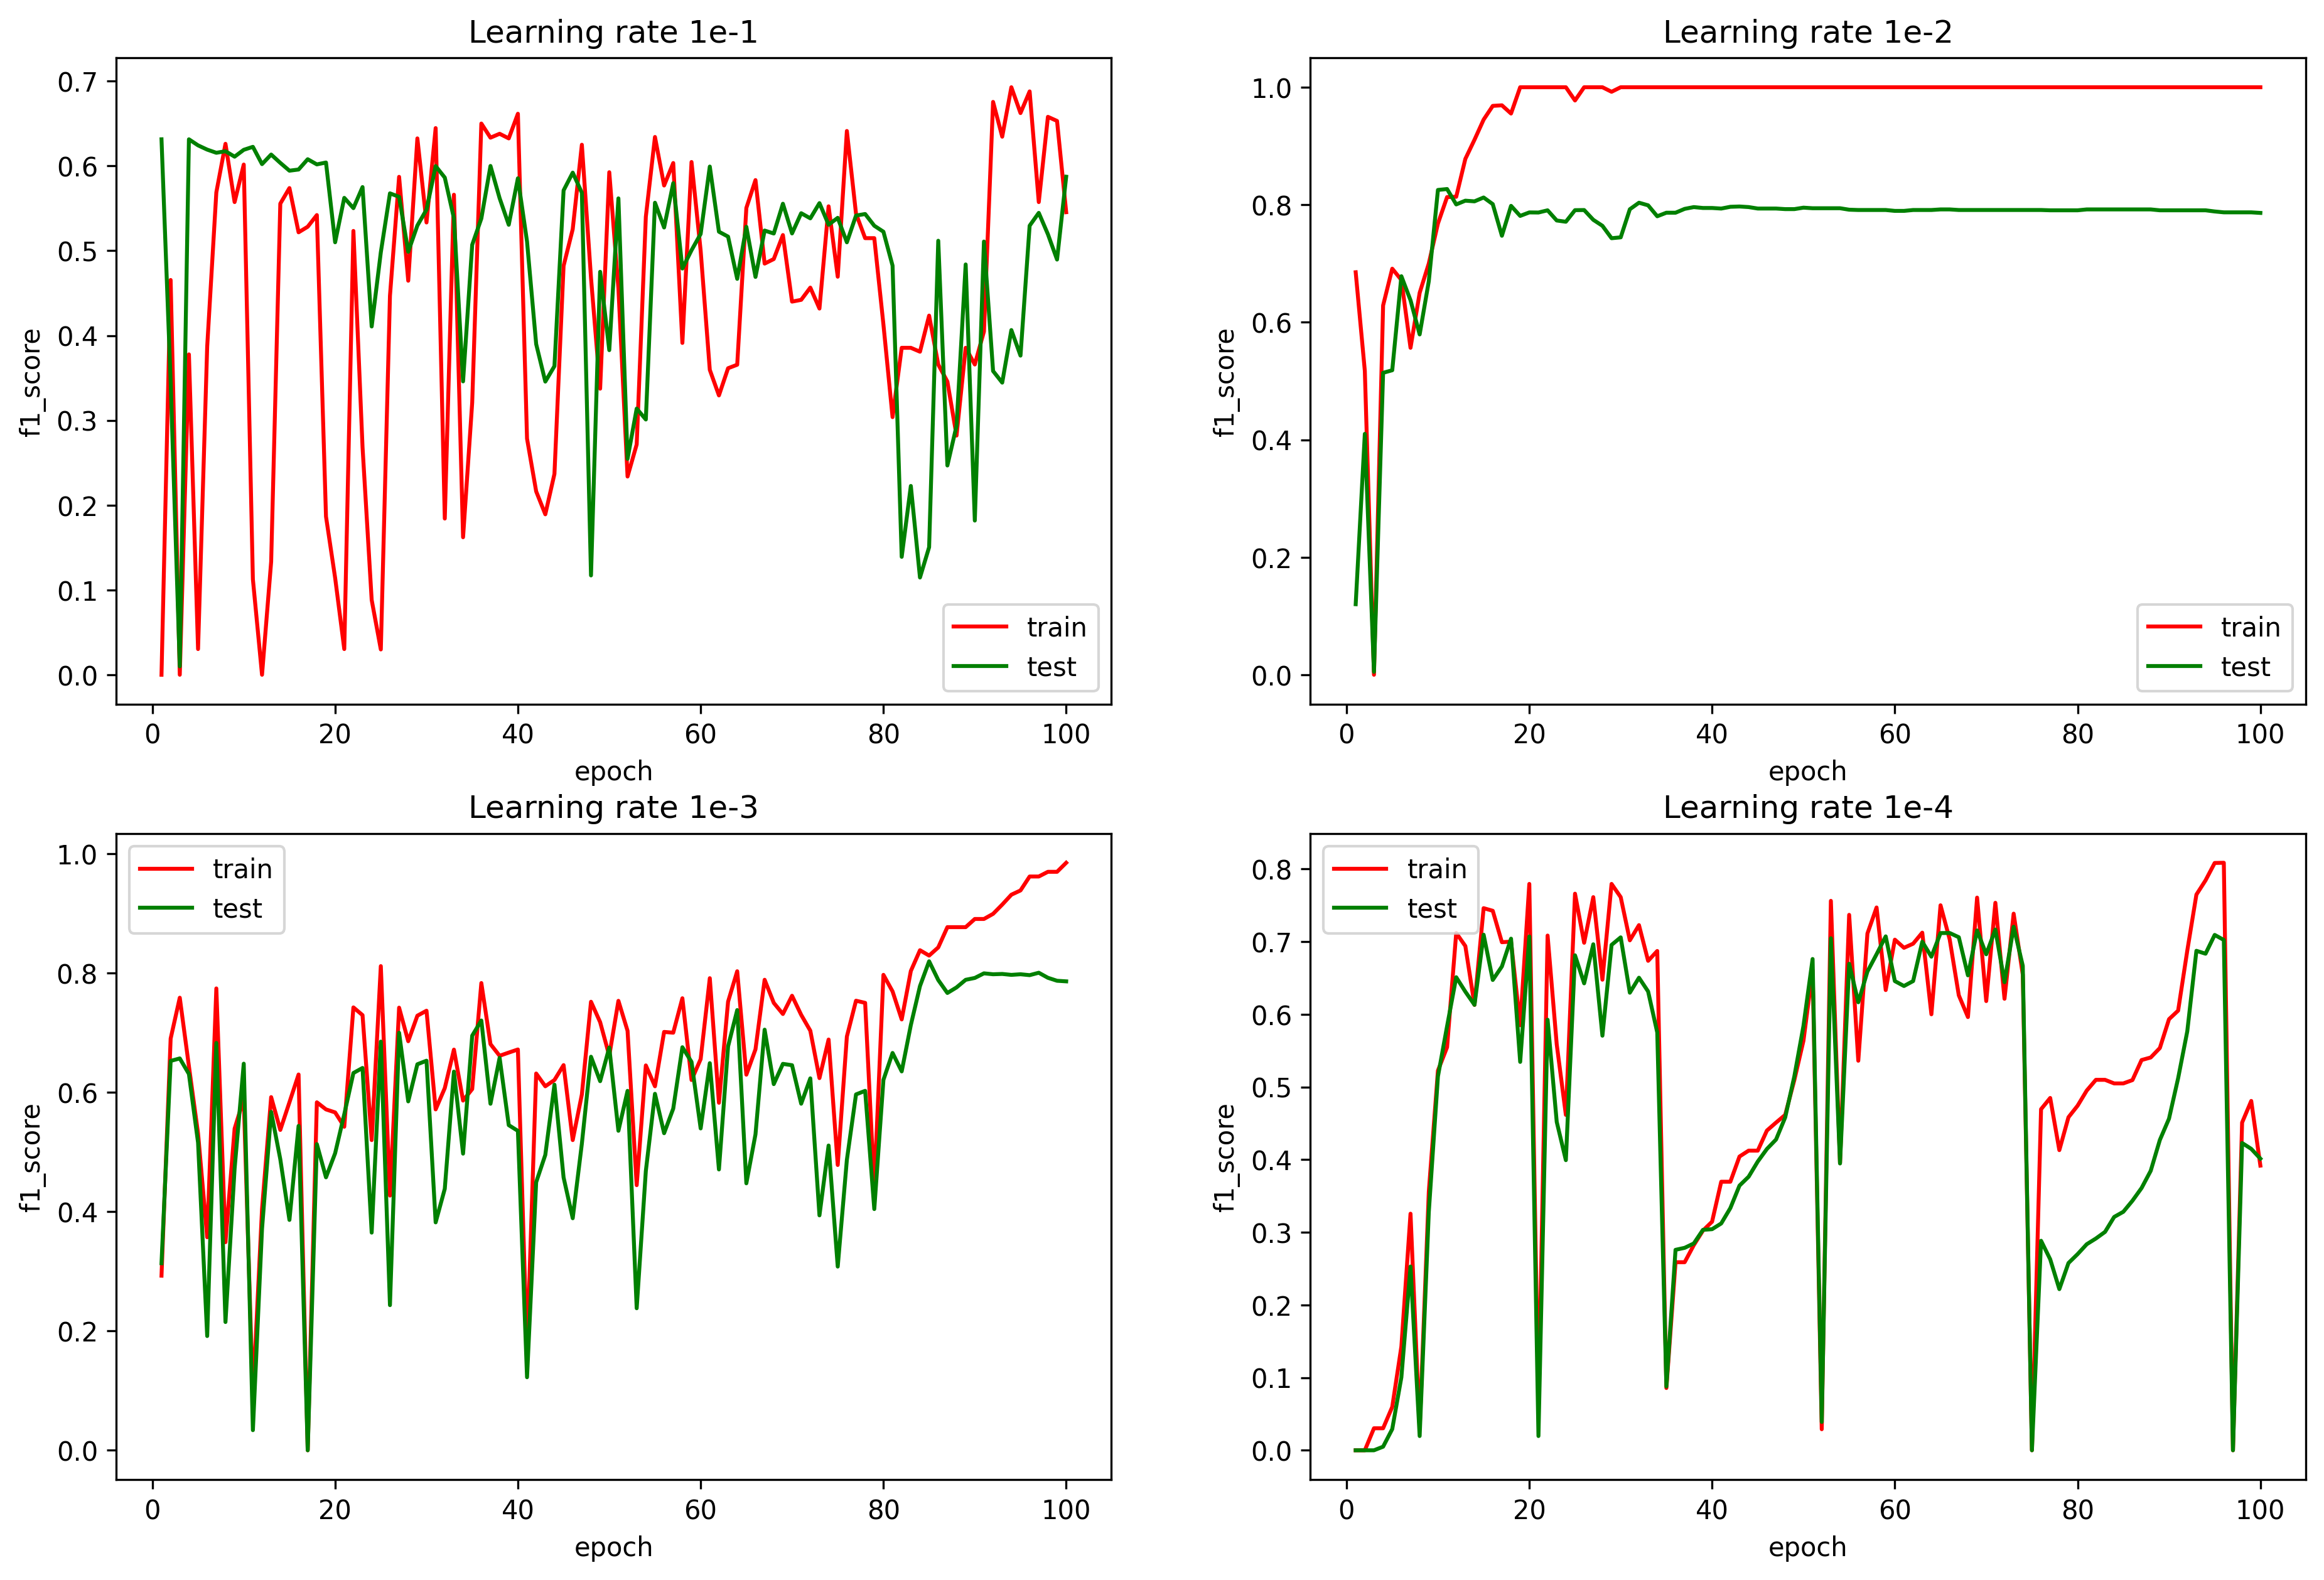

In [ ]:
# Use Optimal Pramaters in Section 4
"""emb, vocab = skipGramParameter(posts_full, 100, 2)
emb_dim = 100
emb_table = np.array(emb)
word_list = list(vocab.keys())
word_index = vocab
vocab_size = len(word_list)

# Embedding Encoding
len_list = [len(s) for s in training_posts_full]
seq_length = max(len_list)
train_encoded = encode_and_add_padding(training_posts_full, seq_length, word_index)
test_encoded = encode_and_add_padding(testing_posts_full, seq_length, word_index)"""


def getHyper(dataset, dataset_label, word_list, lr, epoch_num):
  set_seed(33)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  batch_size = 256
  total_epoch = epoch_num
  learning_rate = lr

  # Initialize model, set up the loss calculator and optimizer
  model = Bi_LSTM_Emb(vocab_size = vocab_size, emb_dim = emb_dim, emb_table = emb_table).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  f1_trainList = []
  f1_testList = []

  # Training the model
  for epoch in range(total_epoch):
      train_loss = 0
      for ind in range(0,len(dataset_label),batch_size):
          input_batch = dataset[ind:min(ind+batch_size, len(dataset))]
          target_batch = dataset_label[ind:min(ind+batch_size, len(dataset_label))]
          # input_torch = torch.from_numpy(np.array(input_batch)).to(device)
          input_torch = [torch.tensor(x, device=device) for x in input_batch]
          target_torch = torch.from_numpy(np.array(target_batch)).view(-1).to(device)

          model.train()
          optimizer.zero_grad()
          outputs = model(input_torch)
          loss = criterion(outputs,  target_torch)
          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      predicted = torch.argmax(outputs, -1)
      f1= f1_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
      f1_trainList.append(f1)
      # Evaluation
      outputs = model([torch.tensor(x, device=device) for x in test_encoded])
      test_predicted = torch.argmax(outputs, 1)
      test_actual = torch.from_numpy(np.array(testing_labels_encoded)).view(-1).to(device)
      f1_test = f1_score(test_predicted.cpu().numpy(),test_actual.cpu().numpy())
      f1_testList.append(f1_test)
      # print('Epoch: %d, train_loss: %.5f, train_F1Score: %.2f' %(epoch + 1, loss.item(), f1))

  print('Finished Training')
  return f1_trainList, f1_testList


def lrEvaluation(lr_data):
  lr_Evaluation = {}
  for info, lr in lr_data.items():
    # Defaul Bi-LSTM
    # Get trained
    f1_trainList, f1_testList = getHyper(train_encoded, training_labels_encoded, word_list, lr, 100)
    lr_Evaluation[info] = [f1_trainList, f1_testList]
  return lr_Evaluation

lr_dataset = {'Learning rate 1e-1': 1e-1}
lr_dataset = {'Learning rate 1e-1': 1e-1, 'Learning rate 1e-2': 1e-2, 'Learning rate 1e-3': 1e-3, 'Learning rate 1e-4': 1e-4}
lr_Evaluation = lrEvaluation(lr_dataset)

print(lr_Evaluation['Learning rate 1e-1'])

####### Figure Plot
import matplotlib.pyplot as plt
# Drawing Graph
plt.figure(3,figsize = (15,10),dpi = 300)
x = []
for i in range(100):
  x.append(i+1)
num = 0
for lr, f1 in lr_Evaluation.items():
  plt.subplot(2,2,num+1)
  plt.plot(x,f1[0],'r',label = 'train')
  plt.plot(x,f1[1],'g',label = 'test')
  plt.title(lr)
  plt.xlabel('epoch')
  plt.ylabel('f1_score')
  plt.legend()
  num += 1

**Jusitify and Explanation**

As shown in four graphs, When leanring rate is 0.01, the trained model become steady which means the global minimum have been reached. If the learning rate is set too large, such as 0.1, as can be seen from the first graph above, global minimum can be missed and so that the model can be quite hard to covex. If the learning rate was set too small, 0.001 or 0.0001, it is hard for the model to cross the local minimum, and the whold process can be time consumed and hard to covex.      

#5 - Test your model via Colab Form Fields User Interface

In [ ]:
# import libraries
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = sw.words()

################# Preprocessing Techniques#################
import re
def url_removal_re(x):
    x = re.sub(r'http\S+', '', x)
    return x

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    return x

def defaultPreprocessing(postset):
  pre_postset = []
  for post in postset:
    post_token = word_tokenize(remove_punctuation_re(post.lower()))
    # stopwords removal
    filtered_post = [w for w in post_token if not w in stop_words]
    pre_postset.append(filtered_post)
  return pre_postset

def stemming(post):
  stemmer = PorterStemmer()
  post = [stemmer.stem(x) for x in post]
  return post

# lemmatisation
def lemmatisation (post):
  lemmatizer = WordNetLemmatizer()
  post = [lemmatizer.lemmatize(w) for w in post ]
  return post

def full_preprocessing(postset):
  """
  This function contains all pre-processing techniques: url removal, default, stemming, and lemmatisation
  """
  # url removal
  postset = [url_removal_re(post) for post in postset]
  # default preprocessing
  postset = defaultPreprocessing(postset)
  #stemming
  postset = [lemmatisation(stemming(post)) for post in postset]
  return postset

####### Full_preprocesing with all data
"""training_posts_full = full_preprocessing(training_posts)
testing_posts_full = full_preprocessing(testing_posts)"""

####### Intermedia data to save time
def Read_list(filename):
    file1 = open(filename+".txt", "r")
    list_row =file1.readlines()
    list_source = []
    for i in range(len(list_row)):
        column_list = list_row[i].strip().split("\t")
        list_source.append(column_list)
    file1.close()
    return list_source

id = '1SNmI83Efq9si_R_gQuE2HeW2KAbVmaaW'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Full_training.txt')

id = '1NcNwVMVRkS-b3A2JY4IQPr45jC07fuHG'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Full_testing.txt')

training_posts_full = Read_list('Full_training')
testing_posts_full = Read_list('Full_testing')
posts_full = training_posts_full + testing_posts_full

################# Label Encoding#################
unique_labels = np.unique(training_labels)

lEnc = LabelEncoder()
# Encode the labels
training_labels_encoded = lEnc.fit_transform(training_labels)
testing_labels_encoded = lEnc.transform(testing_labels)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

################# Skip Gram Embedding#################
def skipGramParameter(dataset, size, window):
  wv_cbow_model = Word2Vec(sentences=dataset, size=size, window=window, min_count=5, workers=1, sg=1)
  emb = wv_cbow_model.wv.vectors
  vocab_obj = wv_cbow_model.wv.vocab
  vocab = {}
  for word, obj in vocab_obj.items():
    vocab[word] = vocab_obj[word].index
  # Adding unknown in the vocabulary
  index = len(vocab)
  vocab['[UNKNOWN]'] = index
  emb = np.concatenate([emb, np.zeros((1, emb.shape[1]))],axis=0)
  return emb, vocab

################# Bi-LSTM Model#################
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
####### Encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        sent_encoded.append(temp_encoded)
    return sent_encoded

####### Bi-LSTM model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, emb_dim, emb_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, 100, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(100*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        length = [len(i) for i in x]
        x = pad_sequence(x, batch_first=True)
        x = self.emb(x)
        # print(x)
        x = pack_padded_sequence(x, length,batch_first=True,enforce_sorted=False)
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

################# Train Function#################
import random
import os
# set random seed for reproduce
def set_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def getTrained(dataset, dataset_label, word_list, lr, epoch_num, model_type):
  set_seed(25)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  batch_size = 128
  total_epoch = epoch_num
  learning_rate = lr

  # Initialize model, set up the loss calculator and optimizer
  model = model_type.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  f1_list = []

  # Training the model
  for epoch in range(total_epoch):
      train_loss = 0
      for ind in range(0,len(dataset_label),batch_size):
          input_batch = dataset[ind:min(ind+batch_size, len(dataset))]
          target_batch = dataset_label[ind:min(ind+batch_size, len(dataset_label))]
          # input_torch = torch.from_numpy(np.array(input_batch)).to(device)
          input_torch = [torch.tensor(x, device=device) for x in input_batch]
          target_torch = torch.from_numpy(np.array(target_batch)).view(-1).to(device)

          model.train()
          optimizer.zero_grad()
          outputs = model(input_torch)
          loss = criterion(outputs,  target_torch)
          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      predicted = torch.argmax(outputs, -1)
      f1= f1_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
      f1_list.append(f1)

      print('Epoch: %d, train_loss: %.5f, train_F1Score: %.2f' %(epoch + 1, loss.item(), f1))

  print('Finished Training')
  return model, f1_list

################# Model Training#################
####### Model Preparation ------ optimal paramters: skipGram (size = 100, window = 2), full_processing data
emb, vocab = skipGramParameter(posts_full, 100, 2)
emb_dim = 100
emb_table = np.array(emb)
word_list = list(vocab.keys())
word_index = vocab

vocab_size = len(word_list)

# Encoding
# Convert the sentences to the word index that aligns with the lookup table
len_list = [len(s) for s in training_posts_full]
seq_length = max(len_list)
train_encoded = encode_and_add_padding(training_posts_full, seq_length, word_index)
test_encoded = encode_and_add_padding(testing_posts_full, seq_length, word_index)

#########################------LSTM------#############################
lstm_model, lstm_f1_list = getTrained(train_encoded, training_labels_encoded, word_list, 0.01, 20,\
                                Bi_LSTM_Emb(vocab_size = vocab_size, emb_dim = emb_dim, emb_table = emb_table))

# Evaluation
outputs = lstm_model([torch.tensor(x, device=device) for x in test_encoded])
test_predicted = torch.argmax(outputs, 1)
test_actual = torch.from_numpy(np.array(testing_labels_encoded)).view(-1).to(device)
lstm_f1_test = f1_score(test_predicted.cpu().numpy(),test_actual.cpu().numpy())

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [ ]:
# url removal
"""
This need to be used in section 4.2 for compariosn of text with url and without url.
parameters need to be string.
"""
import re
def url_removal_re(x):
    x = re.sub(r'http\S+', '', x)
    return x

# import libraries
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = sw.words()

################# Default Preprocessing Techniques#################
####### Including punctuation removal, lowercase, tokenisation, and stopwords removal
# punctuation removal
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    return x

def defaultPreprocessing(postset):
  pre_postset = []
  for post in postset:
    post_token = word_tokenize(remove_punctuation_re(post.lower()))
    # stopwords removal
    filtered_post = [w for w in post_token if not w in stop_words]
    pre_postset.append(filtered_post)
  return pre_postset

################# Changed Preprocessing Techniques#################
####### Except for url removal, stemming and lemmatisation would also change
# stemming
def stemming(post):
  stemmer = PorterStemmer()
  post = [stemmer.stem(x) for x in post]
  return post

# lemmatisation
def lemmatisation (post):
  lemmatizer = WordNetLemmatizer()
  post = [lemmatizer.lemmatize(w) for w in post ]
  return post

################# Full Preprocessing#################
####### Dataset preprocessed with all techniques
def full_preprocessing(postset):
  """
  This function contains all pre-processing techniques: url removal, default, stemming, and lemmatisation
  """
  # url removal
  postset = [url_removal_re(post) for post in postset]
  # default preprocessing
  postset = defaultPreprocessing(postset)
  #stemming
  postset = [lemmatisation(stemming(post)) for post in postset]
  return postset

####### Full_preprocesing with all data
"""training_posts_full = full_preprocessing(training_posts)
testing_posts_full = full_preprocessing(testing_posts)"""

####### Intermedia data to save time
def Read_list(filename):
    file1 = open(filename+".txt", "r")
    list_row =file1.readlines()
    list_source = []
    for i in range(len(list_row)):
        column_list = list_row[i].strip().split("\t")
        list_source.append(column_list)
    file1.close()
    return list_source

id = '1SNmI83Efq9si_R_gQuE2HeW2KAbVmaaW'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Full_training.txt')

id = '1NcNwVMVRkS-b3A2JY4IQPr45jC07fuHG'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Full_testing.txt')

training_posts_full = Read_list('Full_training')
testing_posts_full = Read_list('Full_testing')
posts_full = training_posts_full + testing_posts_full

################# Label Encoding#################

unique_labels = np.unique(training_labels)

lEnc = LabelEncoder()
# Encode the labels
training_labels_encoded = lEnc.fit_transform(training_labels)
testing_labels_encoded = lEnc.transform(testing_labels)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))

def skipGramParameter(dataset, size, window):
  wv_cbow_model = Word2Vec(sentences=dataset, size=size, window=window, min_count=5, workers=1, sg=1)
  emb = wv_cbow_model.wv.vectors
  vocab_obj = wv_cbow_model.wv.vocab
  vocab = {}
  for word, obj in vocab_obj.items():
    vocab[word] = vocab_obj[word].index
  # Adding unknown in the vocabulary
  index = len(vocab)
  vocab['[UNKNOWN]'] = index
  emb = np.concatenate([emb, np.zeros((1, emb.shape[1]))],axis=0)
  return emb, vocab


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

####### Encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        sent_encoded.append(temp_encoded)
    return sent_encoded

####### Bi-LSTM model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, emb_dim, emb_table):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, 100, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(100*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        length = [len(i) for i in x]
        x = pad_sequence(x, batch_first=True)
        x = self.emb(x)
        # print(x)
        x = pack_padded_sequence(x, length,batch_first=True,enforce_sorted=False)
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

import random
import os
# set random seed for reproduce

def set_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def getTrained(dataset, dataset_label, word_list, lr, epoch_num, model_type):
  set_seed(25)
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  batch_size = 128
  total_epoch = epoch_num
  learning_rate = lr

  # Initialize model, set up the loss calculator and optimizer
  model = model_type.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  f1_list = []

  # Training the model
  for epoch in range(total_epoch):
      train_loss = 0
      for ind in range(0,len(dataset_label),batch_size):
          input_batch = dataset[ind:min(ind+batch_size, len(dataset))]
          target_batch = dataset_label[ind:min(ind+batch_size, len(dataset_label))]
          # input_torch = torch.from_numpy(np.array(input_batch)).to(device)
          input_torch = [torch.tensor(x, device=device) for x in input_batch]
          target_torch = torch.from_numpy(np.array(target_batch)).view(-1).to(device)

          model.train()
          optimizer.zero_grad()
          outputs = model(input_torch)
          loss = criterion(outputs,  target_torch)
          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      predicted = torch.argmax(outputs, -1)
      f1= f1_score(predicted.cpu().numpy(),target_torch.cpu().numpy())
      f1_list.append(f1)

      # print('Epoch: %d, train_loss: %.5f, train_F1Score: %.2f' %(epoch + 1, loss.item(), f1))

  print('Finished Training')
  return model, f1_list




#@title Personality Type Prediction



text = "" #@param {type:"string"}


Predicted Personality Type: T


# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*

In [ ]:
# If you used OOP style, use this section